## VICTORIA JOSEPH
## Big Data and Data Mining - Maternal Health Data Analysis

In [1]:
#importing neccesary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Reading file using pandas
maternity_data = pd.read_csv("mhs.csv")
maternity_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
#displaying random data
maternity_data.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
305,22,100,65,6.9,98.0,80,low risk
56,32,120,90,6.4,98.0,70,low risk
863,13,90,65,7.9,101.0,80,mid risk
360,16,100,70,6.9,98.0,80,mid risk
803,19,120,80,7.0,98.0,70,mid risk
883,35,120,60,6.1,98.0,76,low risk
311,35,90,65,6.9,98.0,75,low risk
692,24,120,80,7.5,98.0,66,low risk
1008,48,120,80,11.0,98.0,88,high risk
915,19,90,65,7.5,101.0,70,low risk


In [4]:
#checking for the total row and column of the dataset
maternity_data.shape

(1014, 7)

In [5]:
# Brief description of the dataset
maternity_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
#checking for null values

maternity_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
# Brief information about the data
maternity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
# Calculate the number of subjects per risk level
maternity_data.groupby('RiskLevel')["SystolicBP"].count()

RiskLevel
high risk    272
low risk     406
mid risk     336
Name: SystolicBP, dtype: int64

In [9]:
# Calculate the risk level with mean systolic BP
maternity_data.groupby('RiskLevel')["SystolicBP"].mean()

RiskLevel
high risk    124.194853
low risk     105.866995
mid risk     113.154762
Name: SystolicBP, dtype: float64

## Converting the RiskLevel feature into numerical variable using one-hot encoding

In [10]:
# Converting the risk level column to one-hot encoded and dropping the first variable to minimize high feature dimensionality
# Merge with the dataset
risk_level = pd.get_dummies(maternity_data['RiskLevel'], prefix='RiskLevel')

# Concatenate the one-hot encoded risk levels to the initial DataFrame
new_df = pd.concat([maternity_data, risk_level], axis=1)

# Drop the original risk level column
new_df.drop(['RiskLevel'], axis=1, inplace=True)


In [11]:
#viewing the new concatenated dataset

new_df.sample(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
675,35,140,90,13.00,98.0,70,1,0,0
561,13,90,65,7.50,101.0,80,0,1,0
915,19,90,65,7.50,101.0,70,0,1,0
7,35,85,60,11.00,102.0,86,1,0,0
922,17,85,60,7.50,102.0,86,0,1,0
895,48,120,80,11.00,98.0,88,0,1,0
625,15,76,49,7.50,98.0,77,0,1,0
816,30,120,80,7.50,101.0,76,0,0,1
813,29,130,70,7.50,98.0,78,0,0,1
192,28,83,60,8.00,101.0,86,1,0,0


In [12]:
# Renaming the columns with spaces
new_df.rename(columns={'RiskLevel_low risk': 'RiskLevel_low_risk', 'RiskLevel_mid risk': 'RiskLevel_mid_risk', 'RiskLevel_high risk': 'RiskLevel_high_risk'}, inplace=True)
new_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_high_risk', 'RiskLevel_low_risk', 'RiskLevel_mid_risk'],
      dtype='object')

In [13]:
# Create a backup of the dataframe
maternal_data = new_df.copy()

In [14]:
#checks for the shape of the data
maternal_data.shape

(1014, 9)

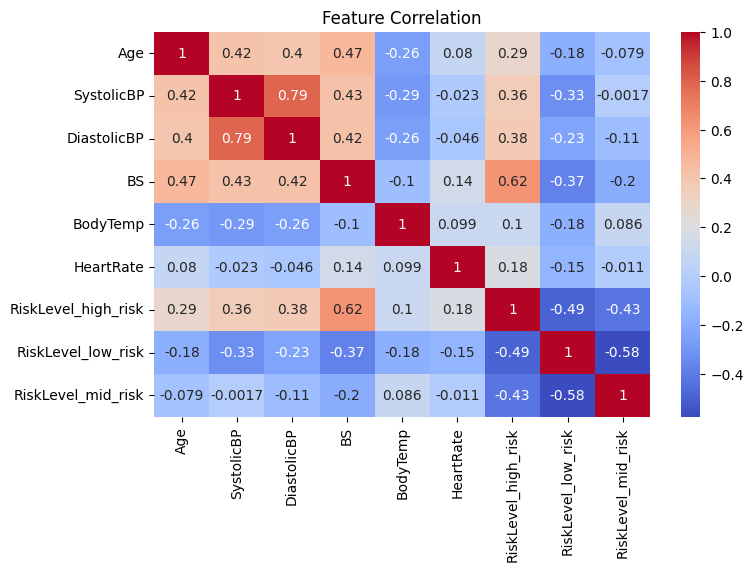

In [63]:
# Calculate the correlation matrix
plt.figure(figsize = [8, 5])
corr_matrix = maternal_data.corr()

# Print the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation')

# Save the heatmap visualization to a file
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

Based on the feature ranking, DiastolicBP, Age, BS, and RiskLevel_high_risk, features will be selected

## Checking for distribution of each variables

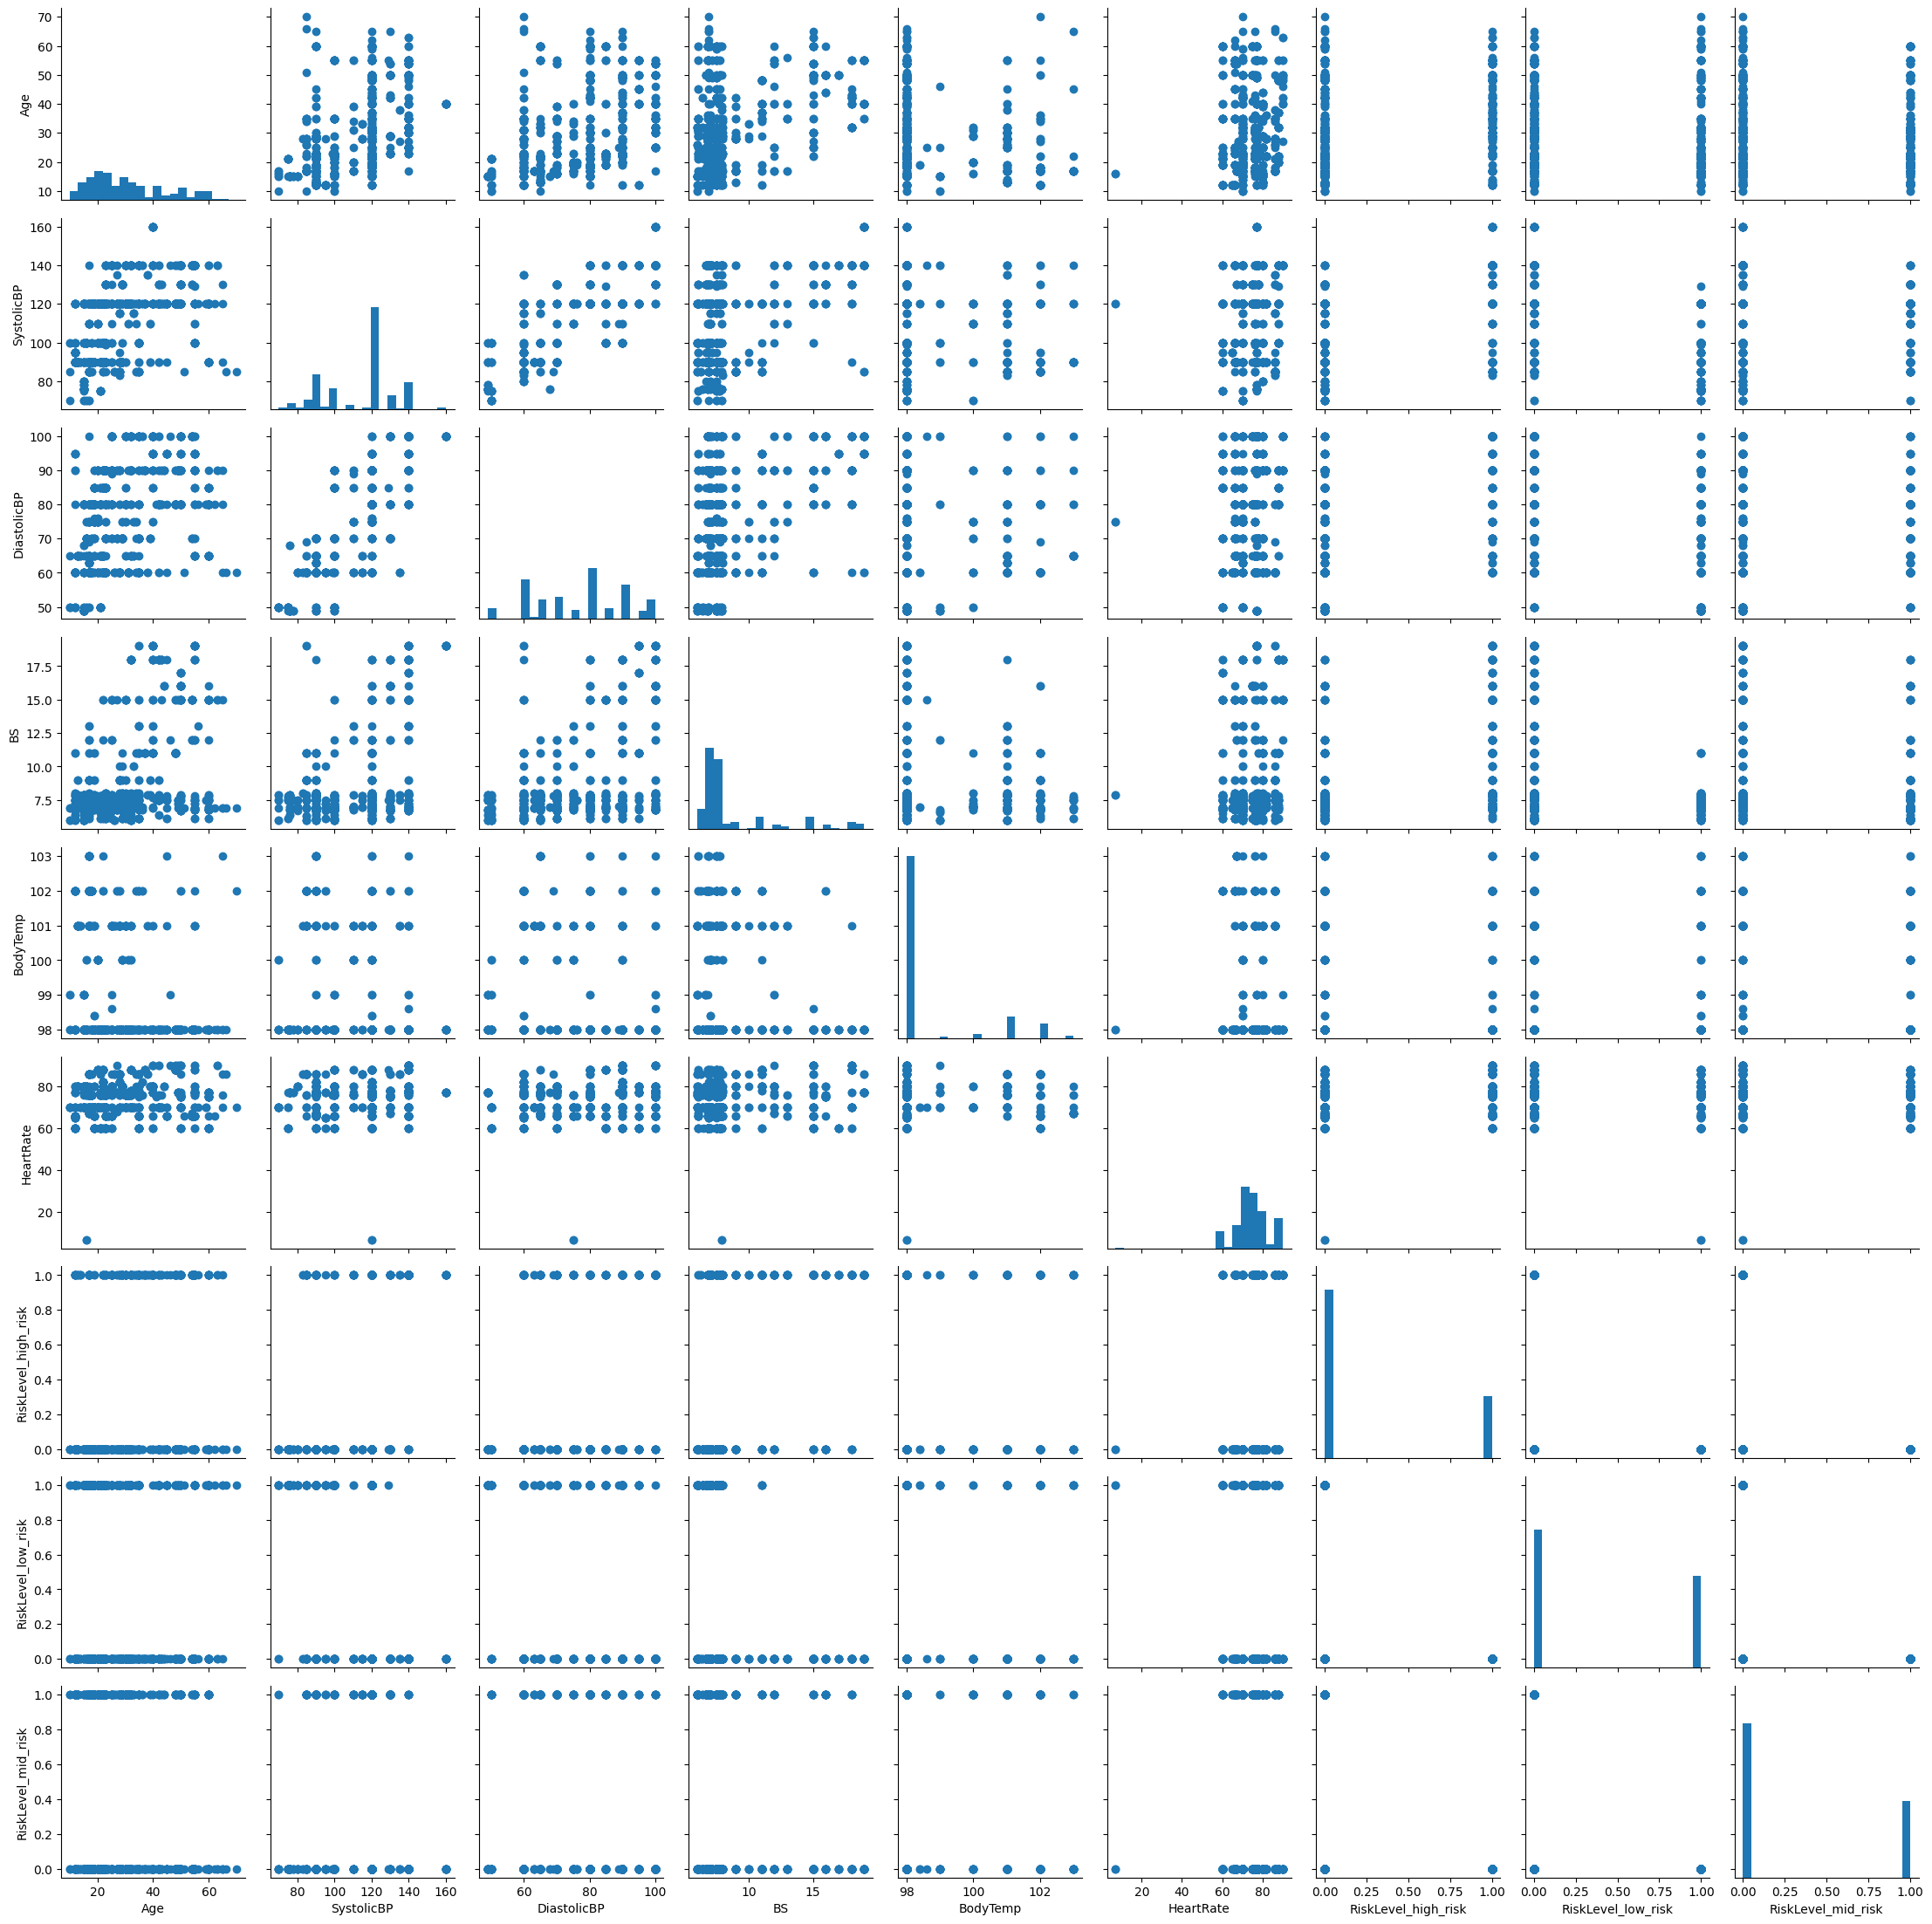

In [16]:
# Plot the graphs of all variables against each other
g = sns.PairGrid(data = maternal_data)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Text(0.5, 1.0, 'Distribution of the Systolic BP')

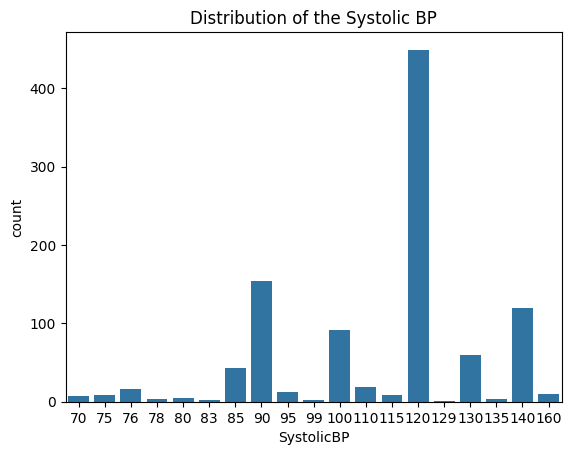

In [17]:
# Check the distribution of the target variable (SystolicBP)
default_color = sns.color_palette()[0]
ax = sns.countplot(data = maternal_data, x = 'SystolicBP', color = default_color)
ax.set_title("Distribution of the Systolic BP")

In [18]:
# Get value counts of the systolicBP
maternal_data["SystolicBP"].value_counts()

120    449
90     154
140    120
100     92
130     60
85      43
110     19
76      16
95      12
160     10
75       8
115      8
70       7
80       5
135      3
78       3
83       2
99       2
129      1
Name: SystolicBP, dtype: int64

In [19]:
# Using SystolicBP as the target variable
X = maternal_data.drop(["SystolicBP"], axis=1)
y = maternal_data["SystolicBP"]

In [20]:
# Drop negatively correlated features and response variables
X = maternal_data.drop(["RiskLevel_mid_risk","RiskLevel_low_risk", "HeartRate", "BodyTemp", "SystolicBP"], axis=1)
X.columns

Index(['Age', 'DiastolicBP', 'BS', 'RiskLevel_high_risk'], dtype='object')

### Creating the train/test split with 80/20 division

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

In [22]:
# Normalize the the input data
min_scaler = MinMaxScaler()
X_train = min_scaler.fit_transform(X_train)
X_test = min_scaler.transform(X_test)

## 1. Fit a Linear Model

In [23]:
# Import Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the model
model = LinearRegression()
history = model.fit(X_train, y_train)

# Make prediction on the test set
y_pred = model.predict(X_test)

In [24]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients, intercept, and evaluation metrics
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R Squared : {:.4f}".format(r2))

Coefficients:  [ 9.60532038 48.29997633  3.43679055  1.39001328]
Intercept:  83.10214488489544
Mean Absolute Error (MAE):  8.843882066854935
Mean Squared Error (MSE):  123.11998025953345
R Squared : 0.6195


## 2. Using Principal Components Analysis to reduce number of variables

In [25]:
# First, standardize the dataset using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Applying PCA to reduce the number of features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Scale the data using Standard scaler
X_pca = pca.fit_transform(X_scaled)

In [27]:
# Split the PCA applied data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=True, random_state=42)
# Fit the model
model = LinearRegression()
history = model.fit(X_train, y_train)
# Make prediction on the test set
y_pred = model.predict(X_test)

In [28]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the coefficients, intercept, and evaluation metrics
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R Squared : {:.4f}".format(r2))

Coefficients:  [ 7.94832811  5.4228678  -9.27303187]
Intercept:  113.38370535078427
Mean Absolute Error (MAE):  8.851152229150557
Mean Squared Error (MSE):  123.30443968255844
R Squared : 0.6190


In [29]:
#check the variance of the PCA

pca.explained_variance_ratio_


array([0.57545471, 0.18792155, 0.15295175])

In [30]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,1.858304,-1.669679,0.060579
1,2.194995,-0.779071,-0.278378
2,0.462623,-1.182905,0.271408
3,0.832589,-0.675202,-0.639015
4,-1.135176,0.412467,0.968958
...,...,...,...
1009,1.080882,-2.321929,1.107615
1010,3.728225,-0.212335,0.890920
1011,2.205416,-2.012390,1.924457
1012,3.320027,-0.787736,0.416534


## 3. Calculating the mean heartrate for each age group

In [31]:
# Find the maximum age
maternal_data["Age"].max()

70

In [32]:
# create age bins for every 10 years
new_df = maternal_data.copy()
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60','61-70']
new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=bins, labels=labels)

In [33]:
#displaying the data
new_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high_risk,RiskLevel_low_risk,RiskLevel_mid_risk,AgeGroup
0,25,130,80,15.0,98.0,86,1,0,0,21-30
1,35,140,90,13.0,98.0,70,1,0,0,31-40
2,29,90,70,8.0,100.0,80,1,0,0,21-30
3,30,140,85,7.0,98.0,70,1,0,0,21-30
4,35,120,60,6.1,98.0,76,0,1,0,31-40
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,0,0,21-30
1010,55,120,90,18.0,98.0,60,1,0,0,51-60
1011,35,85,60,19.0,98.0,86,1,0,0,31-40
1012,43,120,90,18.0,98.0,70,1,0,0,41-50


In [34]:
#viewing data of age froup greater than 60

new_df[new_df['Age']>60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high_risk,RiskLevel_low_risk,RiskLevel_mid_risk,AgeGroup
114,63,140,90,15.0,98.0,90,1,0,0,61-70
313,62,120,80,6.9,98.0,66,0,1,0,61-70
322,65,90,60,6.9,98.0,70,0,1,0,61-70
326,66,85,60,6.9,98.0,86,0,1,0,61-70
338,70,85,60,6.9,102.0,70,0,1,0,61-70
339,65,120,90,6.9,103.0,76,0,1,0,61-70
435,65,130,80,15.0,98.0,86,1,0,0,61-70
502,63,140,90,15.0,98.0,90,1,0,0,61-70


AgeGroup
10-20    72.730640
21-30    75.165079
31-40    74.956284
41-50    76.458333
51-60    71.931034
61-70    79.250000
Name: HeartRate, dtype: float64


Text(0, 0.5, 'HeartRate')

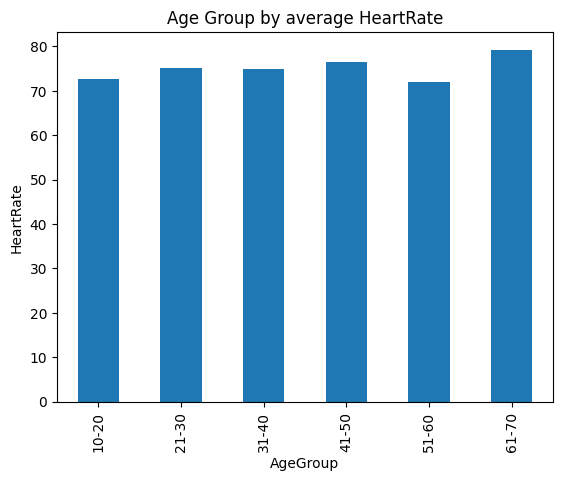

In [35]:
# Calculate the age group with mean Heart Rate and plot the bar graph
print(new_df.groupby('AgeGroup')["HeartRate"].mean())
new_df.groupby('AgeGroup')["HeartRate"].mean().plot(kind="bar")
# Add title and labels  
plt.title('Age Group by average HeartRate')
plt.ylabel('HeartRate')

## 4. Calculate Support, Confidence, Conviction and Lift

### Group Systolic BP into low, Normal and high

In [36]:
# low_systolic => <110
# normal_systolic => 110-140
# high_systolic => >140

# Create a backup copy
new_df = new_df.copy()

# Group systolic bp values into bins
bins = [0, 109, 140, 200]
labels = ['Low', 'Normal', 'High']
new_df['SystolicBPRange'] = pd.cut(new_df['SystolicBP'], bins=bins, labels=labels)
new_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high_risk,RiskLevel_low_risk,RiskLevel_mid_risk,AgeGroup,SystolicBPRange
0,25,130,80,15.0,98.0,86,1,0,0,21-30,Normal
1,35,140,90,13.0,98.0,70,1,0,0,31-40,Normal
2,29,90,70,8.0,100.0,80,1,0,0,21-30,Low
3,30,140,85,7.0,98.0,70,1,0,0,21-30,Normal
4,35,120,60,6.1,98.0,76,0,1,0,31-40,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,0,0,21-30,Normal
1010,55,120,90,18.0,98.0,60,1,0,0,51-60,Normal
1011,35,85,60,19.0,98.0,86,1,0,0,31-40,Low
1012,43,120,90,18.0,98.0,70,1,0,0,41-50,Normal


### Group Diastolic BP into Low, Normal and High

In [37]:
# low_diastolic => <70
# normal_diastolic => 70-90
# high_diastolic => >90


# Group values into bins
bins = [0, 69, 90, 200]
labels = ['Low', 'Normal', 'High']
new_df['DiastolicBPRange'] = pd.cut(new_df['DiastolicBP'], bins=bins, labels=labels)
new_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high_risk,RiskLevel_low_risk,RiskLevel_mid_risk,AgeGroup,SystolicBPRange,DiastolicBPRange
0,25,130,80,15.0,98.0,86,1,0,0,21-30,Normal,Normal
1,35,140,90,13.0,98.0,70,1,0,0,31-40,Normal,Normal
2,29,90,70,8.0,100.0,80,1,0,0,21-30,Low,Normal
3,30,140,85,7.0,98.0,70,1,0,0,21-30,Normal,Normal
4,35,120,60,6.1,98.0,76,0,1,0,31-40,Normal,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,0,0,21-30,Normal,Low
1010,55,120,90,18.0,98.0,60,1,0,0,51-60,Normal,Normal
1011,35,85,60,19.0,98.0,86,1,0,0,31-40,Low,Low
1012,43,120,90,18.0,98.0,70,1,0,0,41-50,Normal,Normal


## Finding associations between pairs high/high, normal/normal, and low/low diastolic and systolic blood pressure

In [38]:
# Extracting the range values
maternal_df = new_df[["SystolicBPRange", "DiastolicBPRange"]]
maternal_df

,SystolicBPRange,DiastolicBPRange
0,Normal,Normal
1,Normal,Normal
2,Low,Normal
3,Normal,Normal
4,Normal,Low
...,...,...
1009,Normal,Low
1010,Normal,Normal
1011,Low,Low
1012,Normal,Normal


In [39]:
# Convert the two variables into one-hot encoded format suitable for the apriori algorithm
systolic = pd.get_dummies(maternal_df['SystolicBPRange'], prefix='Systolic')
diastolic = pd.get_dummies(maternal_df['DiastolicBPRange'], prefix='Diastolic')


# Concatenate the one-hot encoded risk levels to the initial DataFrame
encoded_df = pd.concat([maternal_df, systolic, diastolic], axis=1)

encoded_df

,SystolicBPRange,DiastolicBPRange,Systolic_Low,Systolic_Normal,Systolic_High,Diastolic_Low,Diastolic_Normal,Diastolic_High
0,Normal,Normal,0,1,0,0,1,0
1,Normal,Normal,0,1,0,0,1,0
2,Low,Normal,1,0,0,0,1,0
3,Normal,Normal,0,1,0,0,1,0
4,Normal,Low,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1009,Normal,Low,0,1,0,1,0,0
1010,Normal,Normal,0,1,0,0,1,0
1011,Low,Low,1,0,0,1,0,0
1012,Normal,Normal,0,1,0,0,1,0


In [40]:
# Drop SystolicBPRange and DiastolicBPRange
encoded_df.drop(["SystolicBPRange", "DiastolicBPRange"], axis = 1, inplace = True)
encoded_df

,Systolic_Low,Systolic_Normal,Systolic_High,Diastolic_Low,Diastolic_Normal,Diastolic_High
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1009,0,1,0,1,0,0
1010,0,1,0,0,1,0
1011,1,0,0,1,0,0
1012,0,1,0,0,1,0


In [57]:
#surpress any warnings
import warnings
warnings.filterwarnings('ignore')

# calculating item frequency using the Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(encoded_df, min_support = 0.005, use_colnames = True, verbose = 1)
frequent_itemsets

Processing 18 combinations | Sampling itemset size 3


,support,itemsets
0,0.339250,(Systolic_Low)
1,0.650888,(Systolic_Normal)
2,0.009862,(Systolic_High)
3,0.316568,(Diastolic_Low)
4,0.562130,(Diastolic_Normal)
5,0.121302,(Diastolic_High)
6,0.266272,"(Diastolic_Low, Systolic_Low)"
7,0.072978,"(Diastolic_Normal, Systolic_Low)"
8,0.050296,"(Diastolic_Low, Systolic_Normal)"
9,0.489152,"(Diastolic_Normal, Systolic_Normal)"


In [58]:
# Select only the interested ones
selected_items = frequent_itemsets.loc[[6,9,11]]
selected_items

,support,itemsets
6,0.266272,"(Diastolic_Low, Systolic_Low)"
9,0.489152,"(Diastolic_Normal, Systolic_Normal)"
11,0.009862,"(Systolic_High, Diastolic_High)"


In [59]:
# Creating association rules among the variables
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diastolic_Low),(Systolic_Low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835,0.873048
1,(Systolic_Low),(Diastolic_Low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035,0.903018
2,(Diastolic_Normal),(Systolic_Low),0.562130,0.339250,0.072978,0.129825,0.382681,-0.117725,0.759329,-0.786511
3,(Systolic_Low),(Diastolic_Normal),0.339250,0.562130,0.072978,0.215116,0.382681,-0.117725,0.557879,-0.709420
4,(Diastolic_Low),(Systolic_Normal),0.316568,0.650888,0.050296,0.158879,0.244095,-0.155754,0.415056,-0.819207
5,(Systolic_Normal),(Diastolic_Low),0.650888,0.316568,0.050296,0.077273,0.244095,-0.155754,0.740665,-0.898687
6,(Diastolic_Normal),(Systolic_Normal),0.562130,0.650888,0.489152,0.870175,1.336906,0.123268,2.689109,0.575523
7,(Systolic_Normal),(Diastolic_Normal),0.650888,0.562130,0.489152,0.751515,1.336906,0.123268,1.762159,0.721843
8,(Diastolic_High),(Systolic_Normal),0.121302,0.650888,0.111440,0.918699,1.411456,0.032486,4.294083,0.331754
9,(Systolic_Normal),(Diastolic_High),0.650888,0.121302,0.111440,0.171212,1.411456,0.032486,1.060221,0.835008


In [44]:
# Select only the interested ones
rules = rules.loc[[0,7,11]]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Diastolic_Low),(Systolic_Low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835,0.873048
7,(Systolic_Normal),(Diastolic_Normal),0.650888,0.562130,0.489152,0.751515,1.336906,0.123268,1.762159,0.721843
11,(Diastolic_High),(Systolic_High),0.121302,0.009862,0.009862,0.081301,8.243902,0.008666,1.077761,1.000000


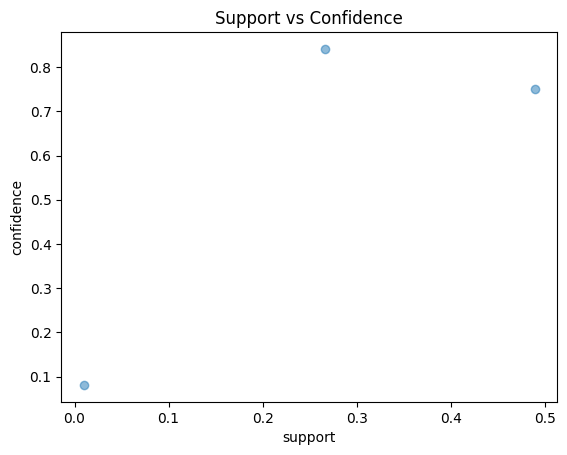

In [45]:
# Support vs Confidence graph
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

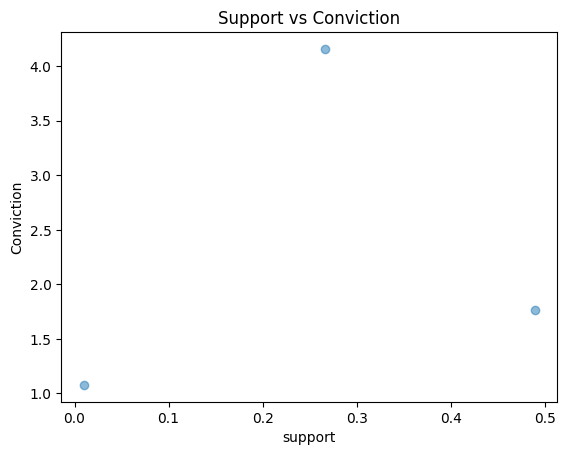

In [46]:
# Support vs Conviction graph
plt.scatter(rules['support'], rules['conviction'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('Conviction')
plt.title('Support vs Conviction')
plt.show()

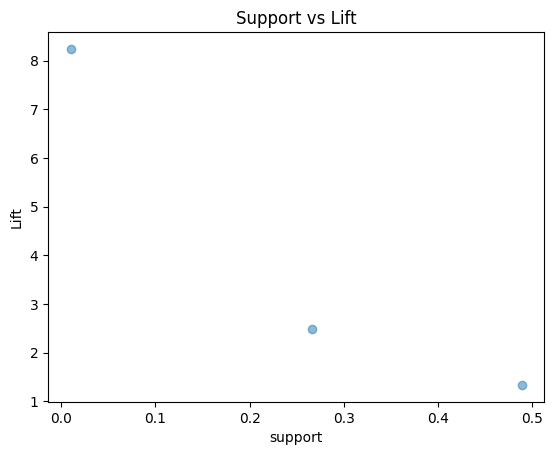

In [47]:
# Support vs Lift graph
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

## Creating clusters of patient with similar SystolicBP

In [48]:
# Extracting both Age and SystolicBP features
sys = pd.DataFrame(new_df[["Age","SystolicBP"]])

In [49]:
# Importing standard scaler for scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Normalize the data
df_normalized = scaler.fit_transform(sys)

In [50]:
# Importing K-Means clustering
from sklearn.cluster import KMeans

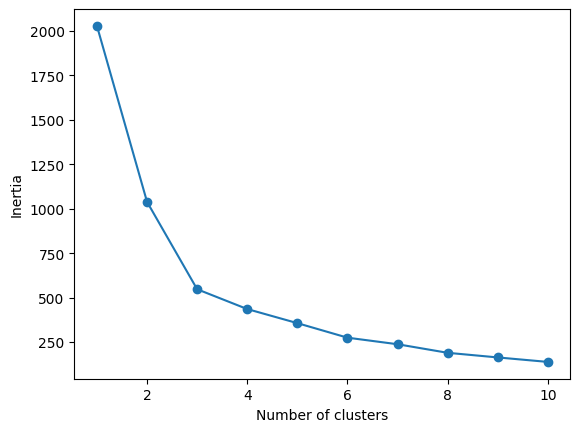

In [51]:
#surpress warnings that may occur
import warnings
warnings.filterwarnings("ignore")

# Find out the optimal K-value using the elbow method
inertia = []

for k in range(1, 11):
    # create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the model to the normalized data
    kmeans.fit(df_normalized)
    # append the inertia value to the list
    inertia.append(kmeans.inertia_)

# plot the inertia values for different values of k
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Best value = 3 (the elbow curve)

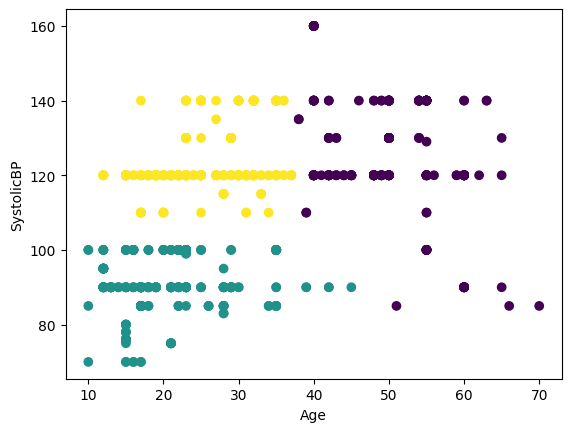

In [52]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(df_normalized)

# plot the scatterplot with points colored by their assigned cluster
plt.scatter(new_df["Age"], new_df["SystolicBP"], c=new_df['Cluster'])
plt.xlabel("Age")
plt.ylabel("SystolicBP")
plt.show()

## Calculate correlation between age and systolic BP

In [53]:
# Assign age and systolicBP into x and y variables
x = new_df["Age"]
y = new_df["SystolicBP"]
# Calculate the correlation
correlation = x.corr(y)
correlation

0.4160454479747331

Text(0.5, 1.0, 'Correlation between Age and SystolicBP')

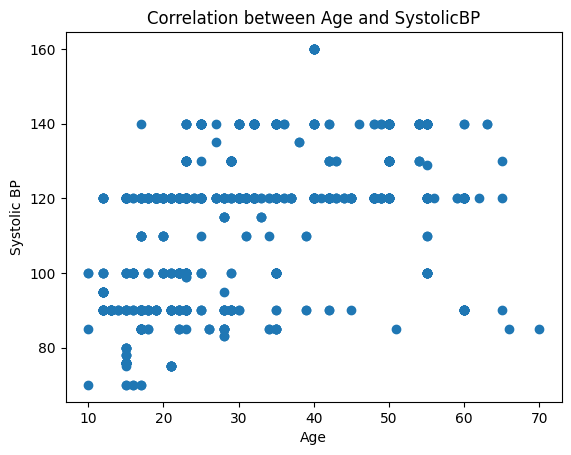

In [54]:
# Plot the graph between the two variables
plt.scatter(x, y)
plt.ylabel('Systolic BP')
plt.xlabel('Age')
plt.title('Correlation between Age and SystolicBP')